##### Write your code wherever specified and do not change the other code


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

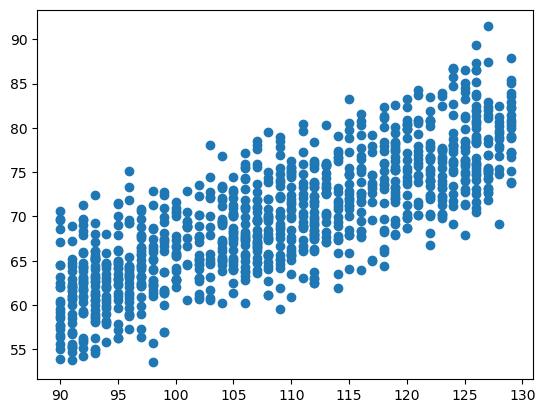

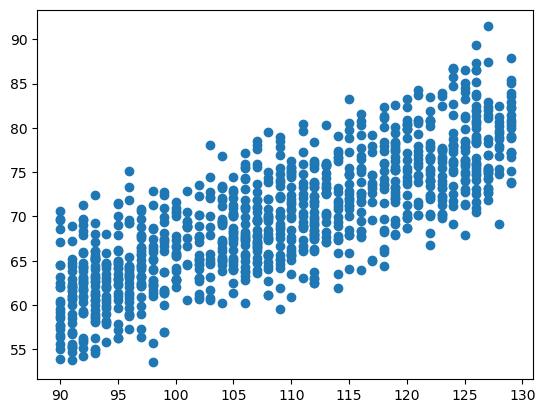

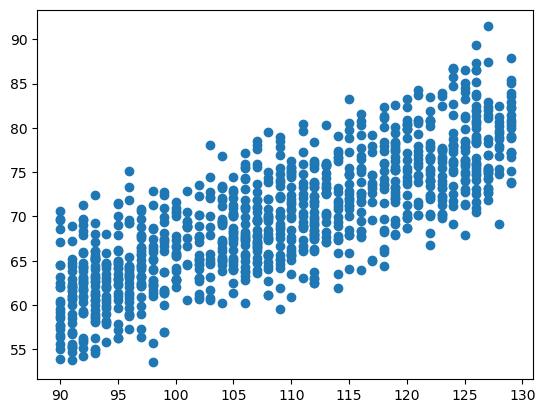

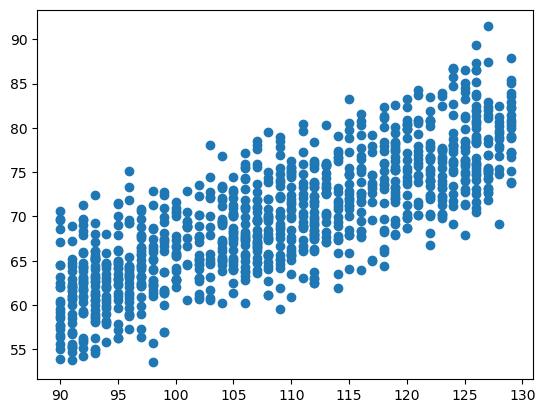

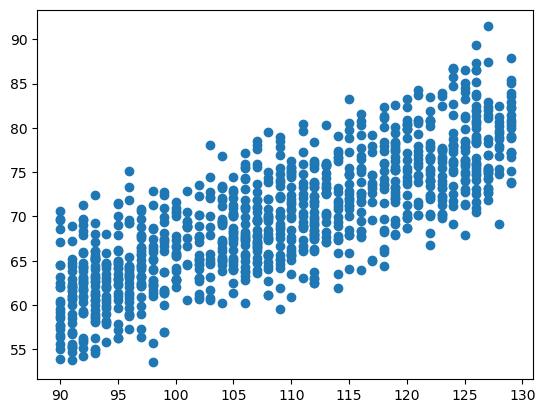

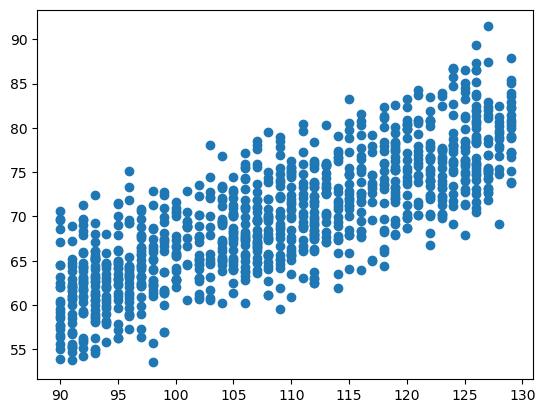

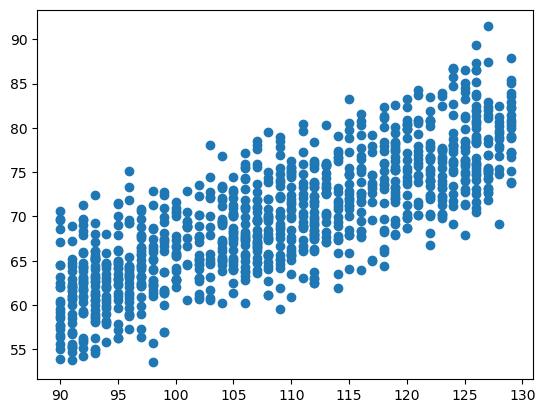

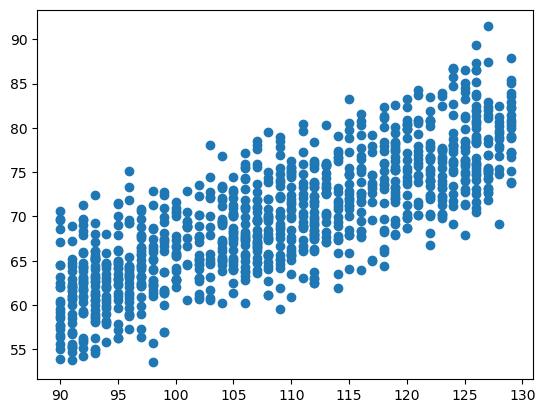

In [24]:
# Use the file namd 'training data' to train the model

data = pd.read_excel("C:\\Users\\ameya\\OneDrive\\Desktop\\Training data.xlsx")
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
for i in range(8):
  plt.scatter(x_train[:,7],y_train)
  plt.show()
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers

def feature_changing(x_train):
  modified_features = []

  for i in range(x_train.shape[1]):
        if isinstance(x_train[0, i], str):  # Check if the feature is categorical
            label_encoder = LabelEncoder()
            encoded_feature = label_encoder.fit_transform(x_train[:, i])  # Encode the categorical feature
            modified_features.append(encoded_feature)
        else:
            modified_features.append(x_train[:, i])  # Keep numeric features as they are

    # Combine features into a new matrix
  x_train_encoded = np.column_stack(modified_features)
  # ---------
    # Your code here
  # ---------
  return x_train_encoded

x_train = feature_changing(x_train)

In [25]:
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)

    # Avoid division by zero by adding a small epsilon to x_std
    epsilon = 1e-8
    x_std = np.where(x_std == 0, epsilon, x_std)

    # Apply Z-score normalization
    x_train = (x_train - x_mean) / x_std

  # ---------

    return x_train,x_std,x_mean

In [26]:
def cost(x_train,y_train,w,b):
    m = x_train.shape[0]

    # Predicted values
    predictions = np.dot(x_train, w) + b

    # Mean Squared Error computation
    loss = (1 / (2 * m)) * np.sum((predictions - y_train) ** 2)
  
    # Use mean square error as cost function
    # return cost
  # ---------

    return loss

In [27]:
def gradient_descent(x_train,y_train,w,b, learning_rate=0.01, iterations=100):

     m = x_train.shape[0]  # Number of training examples

     for i in range(iterations):
        # Compute predictions
        predictions = np.dot(x_train, w) + b

        # Compute gradients
        dw = (1 / m) * np.dot(x_train.T, (predictions - y_train))  # Gradient for w
        db = (1 / m) * np.sum(predictions - y_train)              # Gradient for b

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

     return w,b

In [28]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
